# 인공지능 개론
## 2주차 실습과제


1. 데이터 로딩

2. 결측치 확인

3. 결측치 제거 (Age인 경우 평균나이로)

4. 레이블 확인 (imbalanced data)

5. 불필요한 컬럼 제거

6. 엔코딩(숫자)   

df['label'].value_counts()를 변환 전/후



5가지 분류 (RF, DT, LR, KNN, SVM) 하고, accuracy 및 confusion matrix 확인

(참조 : https://github.com/MyungKyuYi/AI-class/blob/main/1.%20ML_classfication_breast_cancer.ipynb)

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
#데이터 로딩
file_path = "C:/AI_File/titanic.csv"
df = pd.read_csv(file_path)
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [164]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [165]:
# 레이블 갯수 확인 (변환 전)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

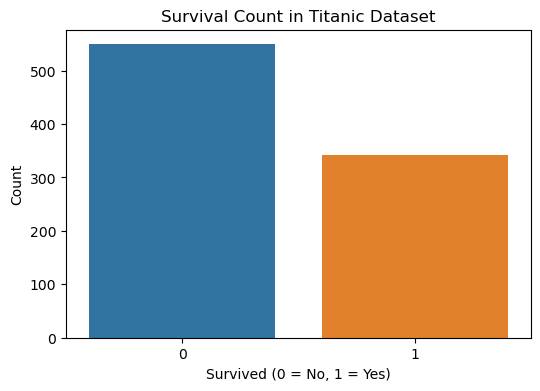

In [166]:
# 레이블 갯수 확인 (그래프)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Survival Count in Titanic Dataset")
plt.show()

In [167]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [168]:
mean_age = df['Age'].mean()

# age 컬럼의 결측치를 평균값으로 채우기

df['Age'] = df['Age'].fillna(mean_age)

In [169]:
# 불필요한 컬럼 제거
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [170]:

# LabelEncoder 초기화

label_encoder = LabelEncoder()

# 특정 컬럼만 인코딩

columns_to_encode = ['Sex']  # 인코딩할 컬럼 리스트

for column in columns_to_encode:

    df[column] = label_encoder.fit_transform(df[column])

display(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Survived'])
y = df['Survived']

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (Scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 결과 확인
print("훈련 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)


훈련 데이터 크기: (712, 6)
테스트 데이터 크기: (179, 6)


In [172]:
print("\n삭제 후 결측값 확인:")
print(df.isnull().sum())


삭제 후 결측값 확인:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [129]:
# 레이블 갯수 확인 (변환 후)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 5가지 분류 (DT, RF, LR, SVM, KNN) 

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\n--Decision Tree Model--")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print("- Classification Report-")
print(classification_report(y_test, dt_pred))
print("- Confusion Matrix -")
print (confusion_matrix(y_test, pred_dt))


--Decision Tree Model--
Accuracy: 0.7654
- Classification Report-
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       105
           1       0.72      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

- Confusion Matrix -
[[65 40]
 [48 26]]


In [200]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Model")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, rf_pred))
print("- Confusion Matrix -")
print (confusion_matrix(y_test, rf_pred))


Random Forest Model
Accuracy: 0.7989
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

- Confusion Matrix -
[[91 14]
 [22 52]]


In [202]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("\nLogistic Regression Model")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, lr_pred))
print("- Confusion Matrix -")
print (confusion_matrix(y_test, lr_pred))


Logistic Regression Model
Accuracy: 0.7989
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

- Confusion Matrix -
[[90 15]
 [21 53]]


In [203]:
from sklearn.svm import SVC

svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("\nSupport Vector Machine Model")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, svm_pred))
print("- Confusion Matrix -")
print (confusion_matrix(y_test, svm_pred))


Support Vector Machine Model
Accuracy: 0.8101
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

- Confusion Matrix -
[[92 13]
 [21 53]]


In [205]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("\nK-Nearest Neighbors Model")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, knn_pred))
print("- Confusion Matrix -")
print (confusion_matrix(y_test, knn_pred))


K-Nearest Neighbors Model
Accuracy: 0.7821
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

- Confusion Matrix -
[[86 19]
 [20 54]]
